In [1]:
%matplotlib inline

In [2]:
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
import plotly.express as px
import scipy.stats as sp

In [4]:
from scipy.interpolate import griddata


In [5]:
import statsmodels.graphics.tsaplots as splt

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
import datetime as dt
from datetime import datetime, timedelta  

dayFile = datetime.now() - timedelta(days=1)
dayFile  = dayFile.strftime("%Y%m%d")

In [21]:
import statsmodels.formula.api as sm
import os

In [37]:
os.chdir("../")
ds=xr.open_dataset("datasat_Tp_J1_J2_J3.nc")
dsat=xr.open_dataset("sat.nc")   

latvalus=ds['lat'][:]

lonvalus=ds['lon'][:]

def get_index(lats,lons,latpt,lonpt):
    
    r = (lats - latpt)**2 + (lons - lonpt)**2
    min_index_flat=r.argmin()
    return np.unravel_index(min_index_flat,lons.shape)


def n_records(indexx,ref_orbite):
    
    iter_=np.arange(604094)
    df_indx=pd.DataFrame()
    df_indx['index']=pd.Series(ds.index)
    df_indx['orbt']=pd.Series(ds.reference_orbit)
    df_indx['n_recd']=pd.Series(iter_)
    resp=df_indx[(df_indx['index']==indexx+1)&(df_indx['orbt']==ref_orbite+1)]
    return resp['n_recd'] #,df_indx[df_indx['orbt']==ref_orbite],df_indx[df_indx['index']==indexx]

    
n_records(3068,86)

409774    409774
Name: n_recd, dtype: int32

<xarray.Dataset>
Dimensions:       (NbLatitudes: 421, NbLongitudes: 541, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2015-01-01
  * NbLatitudes   (NbLatitudes) float64 11.0 11.02 11.03 ... 17.97 17.98 18.0
  * NbLongitudes  (NbLongitudes) float64 334.0 334.0 334.0 ... 343.0 343.0 343.0
Data variables:
    mss_err       (time, NbLongitudes, NbLatitudes) float64 ...
    mss           (time, NbLongitudes, NbLatitudes) float64 ...
Attributes: (12/15)
    FileType:            GRID_DOTS
    CreatedBy:           P. Schaeffer
    CreatedOn:           2016-03-09 14:20:41.720557
    OriginalName:        SMO15_1s60_V2.dat
    contact:             aviso@altimetry.fr
    creator_url:         http://www.aviso.altimetry.fr/en/data/products/auxil...
    ...                  ...
    Conventions:         CF-1.0
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  10.999999999994856
    geospatial_lat_max:  17.999999999994458
    geospatial_lon_min:  -26.0
    geospatial_lon_max:  -17.0

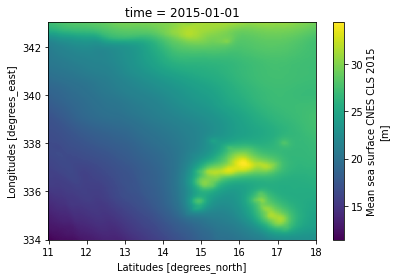

In [38]:
dsat['mss'].plot()
loni=dsat['mss']['NbLongitudes'][:]
lati=dsat['mss']['NbLatitudes'][:]
#dsat[(loni >= 342.5)&(loni <= 342.6)],dsat[(lati >= 14.57)&(lati <= 14.6)]
dsat

In [ ]:
dsat['mss']['NbLongitudes']

<xarray.DataArray 'NbLongitudes' (NbLongitudes: 541)>
array([334.      , 334.016667, 334.033333, ..., 342.966667, 342.983333,
       343.      ])
Coordinates:
  * NbLongitudes  (NbLongitudes) float64 334.0 334.0 334.0 ... 343.0 343.0 343.0
Attributes:
    units:                degrees_east
    long_name:            Longitudes
    _CoordinateAxisType:  Lon
    standard_name:        longitude

In [ ]:
iy=get_index(latvalus,lonvalus, 14.569461,-18.304255+360)

indx_B=iy[0]

orbt_B=iy[1]

#print(ds.Distance_to_coast[orbt])

n_record_B=n_records(indx_B,orbt_B)

#ds['reference_orbit'][n_record]
#ds['index'][n_record_B]
#ds['index']

In [ ]:
iy_1=get_index(latvalus,lonvalus,14.576246,-17.412998+360)
indx_C=iy_1[0]
orbt_C=iy_1[1]
n_record_C=n_records(indx_C,orbt_C)


In [ ]:
iy_=get_index(latvalus,lonvalus,15.010319,-17.572382+360)
indx_A=iy_[0]
orbt_A=iy_[1]
n_record_A=n_records(indx_A,orbt_A)

In [ ]:
iy_2=get_index(latvalus,lonvalus,14.215676,-17.272696+360)
indx_D=iy_2[0]
orbt_D=iy_2[1]
n_record_D=n_records(indx_D,orbt_D)

In [ ]:
ds['lat'][indx_B,orbt_B],ds['lon'][indx_B,orbt_B]
ds['lat'][indx_A,orbt_A],ds['lon'][indx_A,orbt_A]
ds['lat'][indx_C,orbt_C],ds['lon'][indx_C,orbt_C]
ds['lat'][indx_D,orbt_D],ds['lon'][indx_D,orbt_D]

(<xarray.DataArray 'lat' ()>
 array(14.229465)
 Attributes:
     long_name:              latitude
     standard_name:          latitude
     units:                  degrees_north
     valid_min:              -66.14912
     valid_max:              66.14933
     coverage_content_type:  coordinate
     comment:                Positive latitude is North latitude, negative lat...,
 <xarray.DataArray 'lon' ()>
 array(342.739655)
 Attributes:
     long_name:              longitude
     standard_name:          longitude
     units:                  degrees_east
     valid_min:              0.000596
     valid_max:              359.9998
     coverage_content_type:  coordinate
     comment:                East longitude relative to Greenwich meridian. Fi...)

In [ ]:
ds['lat'][indx_A,orbt_A]

rte=ds['lat'][:10]
#rte['orbit']=ds['lat']['reference_orbit']

In [ ]:
ds.Bathymetry[indx_B,orbt_B],ds.Bathymetry[indx_A,orbt_A]

(<xarray.DataArray 'Bathymetry' ()>
 array(32511.)
 Attributes:
     long_name:              Bathymetry
     standard_name:          sea_floor_depth_below_geoid
     source:                 1'x1' bathymetry/topography grid ETOPO1 (Amante a...
     units:                  m
     coverage_content_type:  physicalMeasurement,
 <xarray.DataArray 'Bathymetry' ()>
 array(-27395.)
 Attributes:
     long_name:              Bathymetry
     standard_name:          sea_floor_depth_below_geoid
     source:                 1'x1' bathymetry/topography grid ETOPO1 (Amante a...
     units:                  m
     coverage_content_type:  physicalMeasurement)

In [ ]:

dsat.mss['NbLatitudes']

dsat.mss['NbLongitudes']

<xarray.DataArray 'NbLongitudes' (NbLongitudes: 541)>
array([334.      , 334.016667, 334.033333, ..., 342.966667, 342.983333,
       343.      ])
Coordinates:
  * NbLongitudes  (NbLongitudes) float64 334.0 334.0 334.0 ... 343.0 343.0 343.0
Attributes:
    units:                degrees_east
    long_name:            Longitudes
    _CoordinateAxisType:  Lon
    standard_name:        longitude

In [ ]:
#dsat.mss_err
dsat.mss




<xarray.DataArray 'mss' (time: 1, NbLongitudes: 541, NbLatitudes: 421)>
[227761 values with dtype=float64]
Coordinates:
  * time          (time) datetime64[ns] 2015-01-01
  * NbLatitudes   (NbLatitudes) float64 11.0 11.02 11.03 ... 17.97 17.98 18.0
  * NbLongitudes  (NbLongitudes) float64 334.0 334.0 334.0 ... 343.0 343.0 343.0
Attributes:
    standard_name:  sea_surface_height_above_reference_ellipsoid
    long_name:      Mean sea surface CNES CLS 2015
    units:          m

# DAKAR

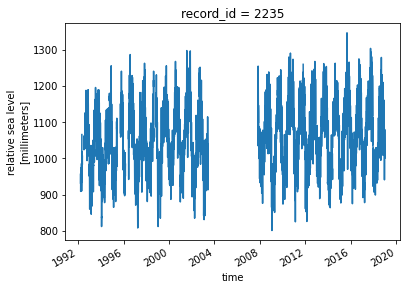

In [ ]:
ds_dakar= xr.open_dataset(r'c:\Users\Admin\Desktop\d223e.nc')

mean_sea_level=ds_dakar.sea_level.mean()

sta_dakar=ds_dakar.sea_level-mean_sea_level
ds_dakar.sea_level.plot()



In [ ]:
ds_dakar['time'].shape[0]

9787

In [ ]:
ds['time'][:,n_record_B]

<xarray.DataArray 'time' (cycle: 1037, N_Records: 1)>
array([['1992-09-29T22:06:24.000000000'],
       ['1992-10-09T20:04:52.000000000'],
       ['1992-10-19T18:03:23.000000000'],
       ...,
       ['2020-10-25T16:43:25.000000000'],
       ['2020-11-04T14:41:57.000000000'],
       ['2020-11-14T12:40:29.000000000']], dtype='datetime64[ns]')
Coordinates:
    index            (N_Records) int16 3069
    reference_orbit  (N_Records) int16 87
Dimensions without coordinates: cycle, N_Records
Attributes:
    standard_name:          time
    comment:                Conversion to Modified Julian Day + fraction of d...
    coverage_content_type:  coordinate

In [ ]:
import matplotlib.pyplot as plt

# point dsat

##### dakar

In [ ]:
x_B=np.array(ds['ssha'][:,n_record_B])
y_B=np.array(ds['time'][:,n_record_B])

In [ ]:
ds['ssha'][:,n_record_B]

<xarray.DataArray 'ssha' (cycle: 1037, N_Records: 1)>
array([[ 33.],
       [ 45.],
       [-10.],
       ...,
       [213.],
       [211.],
       [ nan]], dtype=float32)
Coordinates:
    index            (N_Records) int16 3069
    reference_orbit  (N_Records) int16 87
Dimensions without coordinates: cycle, N_Records
Attributes: (12/34)
    long_name:                                                               ...
    units:                                                                   ...
    coverage_content_type:                                                   ...
    comments:                                                                ...
    Orbit:                                                                   ...
    Solid Earth Tide:                                                        ...
    ...                                                                         ...
    Height_Adjustment_TOPEX_AltB_with_respect_to_Jason-2:                    ...
    Height_Adjustment_TOPEX_AltA_with_respect_to_Jason-2:                    ...
    Height_Adjustment_Poseidon-1(cycles < 132)_with_respect_to_adjusted_TOPEX...
    Height_Adjustment_Poseidon-1(cycles > 132)_with_respect_to_adjusted_TOPEX...
    valid_min:                                                               ...
    valid_max:                                                               ...

In [ ]:
x_A=np.array(ds['ssha'][:,n_record_A])
y_A=np.array(ds['time'][:,n_record_A])

In [ ]:
x_C=np.array(ds['ssha'][:,n_record_C])
y_C=np.array(ds['time'][:,n_record_C])

In [ ]:
x_D=np.array(ds['ssha'][:,n_record_D])
y_D=np.array(ds['time'][:,n_record_D])

In [ ]:
ds

<xarray.Dataset>
Dimensions:            (N_Records: 604094, cycle: 1037, index: 6750, reference_orbit: 127)
Coordinates:
    index              (N_Records) int16 48 49 50 51 52 ... 6737 6738 6739 6740
    reference_orbit    (N_Records) int16 1 1 1 1 1 1 ... 127 127 127 127 127 127
Dimensions without coordinates: N_Records, cycle
Data variables:
    lat                (index, reference_orbit) float32 ...
    lon                (index, reference_orbit) float32 ...
    mssh               (index, reference_orbit) float64 ...
    Distance_to_coast  (index, reference_orbit) float64 ...
    Surface_Type       (index, reference_orbit) float32 ...
    Bathymetry         (index, reference_orbit) float32 ...
    time               (cycle, N_Records) datetime64[ns] ...
    flag               (cycle, N_Records) int16 ...
    ssha               (cycle, N_Records) float32 ...
Attributes: (12/43)
    Conventions:                   CF-1.7, ACDD-1.3
    title:                         Integrated Multi-Mission Ocean Altimeter D...
    summary:                       Geo-registered along-track sea surface hei...
    source:                        TOPEX/Poseidon MGDR_B: Benada, J.R. 1997. ...
    processing_level:              2
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    geospatial_vertical_units:     mm
    geospatial_vertical_positive:  up
    geospatial_lat_resolution:     0.05
    geospatial_lon_resolution:     2.83
    geospatial_vertical_min:       -19991
    geospatial_vertical_max:       19997

31.636999130249023

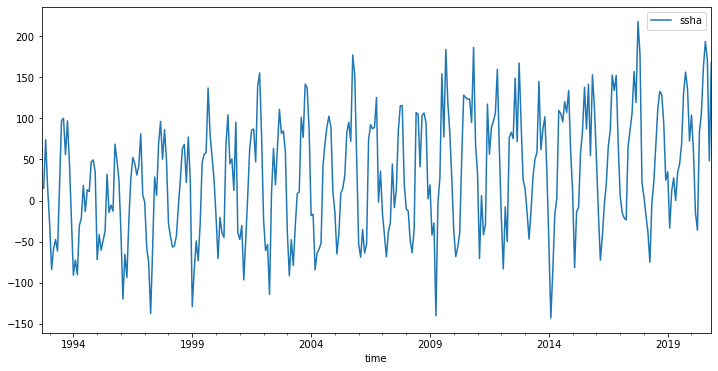

In [ ]:
dfsat_A=pd.DataFrame()
dfsat_A['ssha']=pd.Series(x_A[:,0])
dfsat_A['time']=pd.Series(y_A[:,0])
dfsat_A.set_index('time',inplace=True)
test_A=dfsat_A.resample(rule='M').mean()
#dfsat_1.plot(color='r',figsize=(12,6))
test_A.plot(figsize=(12,6))
#.line(dfsat_1,x='time',y='ssha',labels={x:'time',y:'ssha'})
dfsat_A['ssha'].mean()


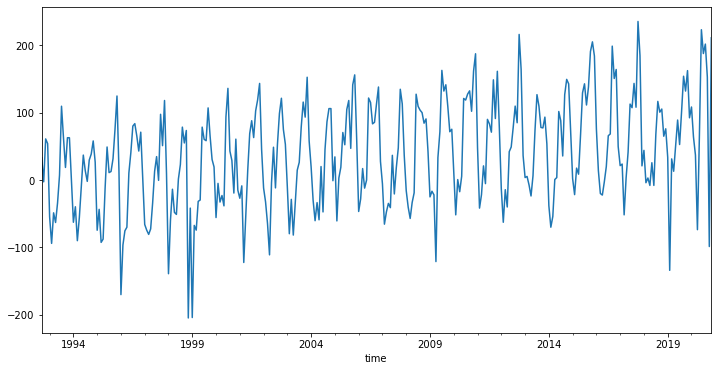

In [ ]:
dfsat_B=pd.DataFrame()
dfsat_B['ssha']=pd.Series(x_B[:,0])
dfsat_B['time']=pd.Series(y_B[:,0])
dfsat_B['tim']=pd.Series(y_B[:,0])
dfsat_B.tim=dfsat_B.tim.map(datetime.toordinal)
dfsat_B.set_index('time',inplace=True)
test_B=dfsat_B.resample(rule='M').mean()
dfsat_B.dropna(inplace=True)

a=test_B['ssha'].plot(figsize=(12,6))


In [ ]:
ols_model = sm.ols(formula = 'ssha ~ tim', data=test_B)
# Alternatively:
#ols_model = sm.ols(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

Intercept, Slope : Intercept   -7035.175569
tim             0.009653
dtype: float64


<AxesSubplot:xlabel='time'>

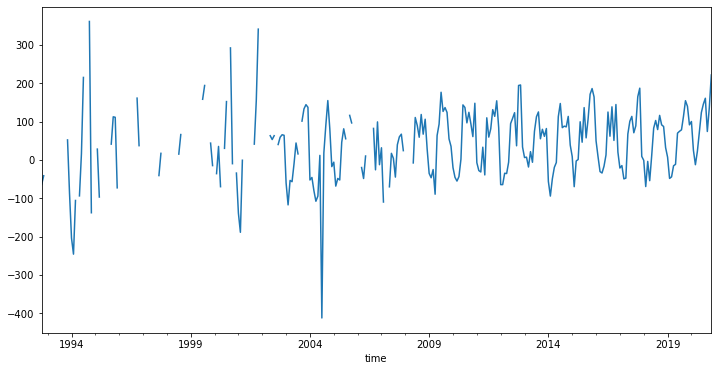

In [ ]:
dfsat_C=pd.DataFrame()
dfsat_C['ssha']=pd.Series(x_C[:,0])
dfsat_C['time']=pd.Series(y_C[:,0])
dfsat_C['tim']=pd.Series(y_C[:,0])
dfsat_C.tim=dfsat_C.tim.map(datetime.toordinal)
dfsat_C.set_index('time',inplace=True)
dfsat_C.dropna(inplace=True)
test_C=dfsat_C.resample(rule='M').mean()

test_C['ssha'].plot(figsize=(12,6))

In [ ]:
ols_model = sm.ols(formula = 'ssha ~ tim', data=test_C)
# Alternatively:
#ols_model = sm.ols(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

Intercept, Slope : Intercept   -6174.248547
tim             0.008466
dtype: float64


<AxesSubplot:xlabel='time'>

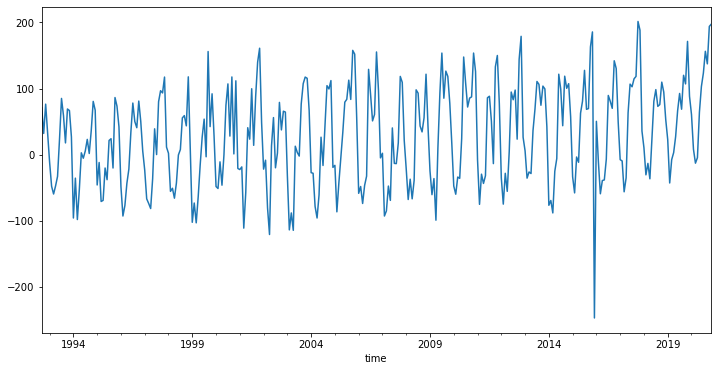

In [ ]:
dfsat_D=pd.DataFrame()
dfsat_D['ssha']=pd.Series(x_D[:,0])
dfsat_D['time']=pd.Series(y_D[:,0])
dfsat_D['tim']=pd.Series(y_D[:,0])
dfsat_D.tim=dfsat_D.tim.map(datetime.toordinal)
dfsat_D.set_index('time',inplace=True)
dfsat_D.dropna(inplace=True)
test_D=dfsat_D.resample(rule='M').mean()


test_D['ssha'].plot(figsize=(12,6))


In [ ]:
ols_model = sm.ols(formula = 'ssha ~ tim', data=test_D)
# Alternatively:
#ols_model = sm.ols(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

Intercept, Slope : Intercept   -4765.661622
tim             0.006543
dtype: float64


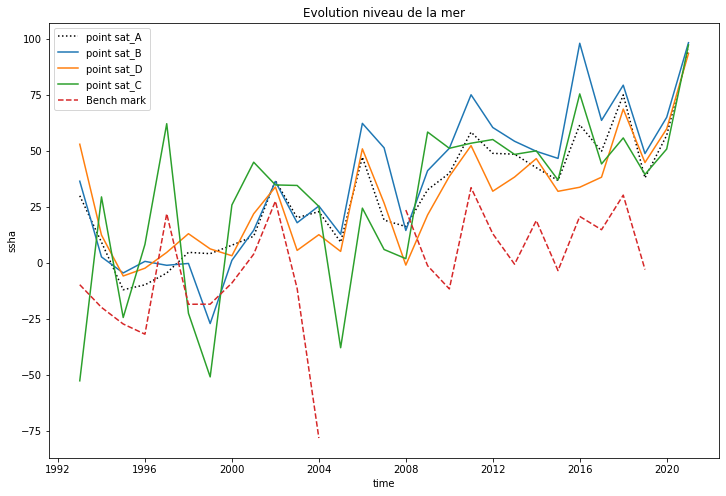

In [ ]:
df_tg_dk=pd.DataFrame()
df_tg_dk['ssha_tg']=pd.Series(sta_dakar[0])
df_tg_dk['time']=pd.Series(ds_dakar['time'])

df_tg_dk.set_index('time',inplace=True)
df_tg_dk.dropna(inplace=True)

test_tg=df_tg_dk.resample(rule='M').mean()

test_tg_=df_tg_dk.resample(rule='A').mean()

test_A_=test_A.resample(rule='A').mean()
test_B_=test_B.resample(rule='A').mean()
test_D_=test_D.resample(rule='A').mean()
test_C_=test_C.resample(rule='A').mean()
plt.figure(figsize=(12,8))

plt.plot(test_A_,label='point sat_A',ls=':',c='k')
plt.plot(test_B_['ssha'],label='point sat_B')
plt.plot(test_D_['ssha'],label='point sat_D')
plt.plot(test_C_['ssha'],label='point sat_C')
plt.plot(test_tg_,label='Bench mark',ls='--')
#plt.plot(join_data_tg['ssha_tg'].resample(rule='A').mean(),label='join Bench... mark')
#plt.plot(data_anDK,label='Bench... mark',ls='--')

plt.xlabel('time')
plt.ylabel('ssha')
plt.title('Evolution niveau de la mer')
plt.legend()
plt.savefig('dakar')


In [ ]:
dk_tg_an=pd.read_excel(r'c:\Users\Admin\Desktop\dakar_an.xlsx')
dk_tg_an.set_index(dk_tg_an['time'],inplace=True)
dk_tg_an.index=test_tg_['1997':'2018'].index
mean_sL=dk_tg_an['msl'].mean()
data_anDK=dk_tg_an['msl']- 5999 - mean_sea_level.values
mean_sea_level.values
mean_sL

6989.8125

time_inx
1942-08-31    -2.466309
1942-09-30   -34.466309
1942-10-31     3.533691
1942-11-30   -35.466309
1942-12-31   -86.466309
                ...    
1966-04-30   -69.466309
1966-05-31   -74.466309
1966-06-30   -31.466309
1966-07-31    40.533691
1966-08-31    20.533691
Name: ssha_tg, Length: 289, dtype: float64


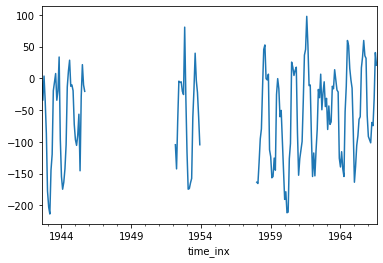

In [ ]:
dk_42=pd.DataFrame()
data=pd.read_excel(r'C:\Users\Admin\Desktop\données mémoire\dakar data\1942-1966.xlsx')
dk_42['time']  =pd.date_range(start='1942-08-15',end='1966-09-15',freq='M') 
dk_42['time_inx']  =pd.date_range(start='1942-08-15',end='1966-09-15',freq='M')
dk_42['ssha_tg']=pd.Series(data['sea_level'])
dk_42.time=dk_42.time.map(datetime.toordinal)
dk_42.set_index('time_inx',inplace=True)
#dk_42.dropna(inplace=True)

dk_42['ssha_tg'] = dk_42['ssha_tg'] - 6009 - mean_sea_level.values
print(dk_42['ssha_tg'])
dk_42['ssha_tg'].plot()
dk_42.dropna(inplace=True)


In [ ]:
y_42=np.array( dk_42['ssha_tg'].values, dtype=float)
x_42=np.array(dk_42['time'].values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x_42,y_42)
xf = np.linspace(min(x_42),max(x_42),7731)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err,'\n',slope,'\n', intercept)


r =  0.09654594610855571 
 p =  0.21876844116815342 
 s =  0.0019137359012924983 
 0.002362691952091446 
 -1747.6562100853307


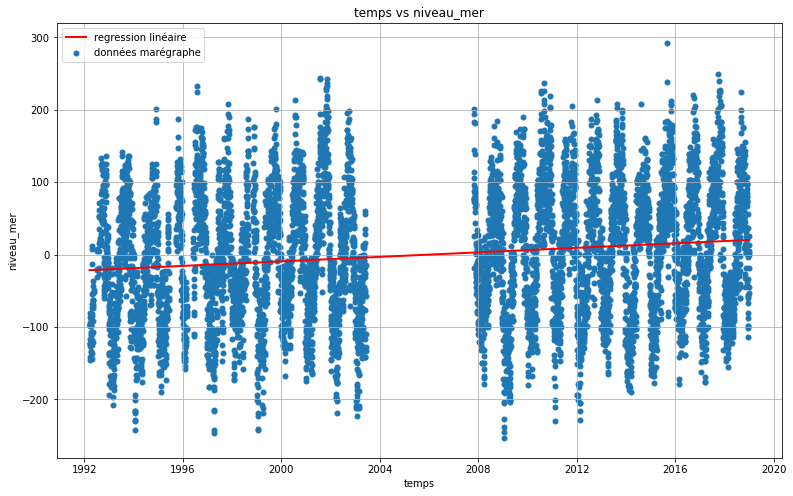

In [ ]:
#tg_dk = pd.DataFrame(data=np.column_stack((ds_dakar['time'], sta_dakar[0])), columns=['time','ssha_tg'])
tg_dk=pd.DataFrame({'ssha_tg':sta_dakar[0],'time':ds_dakar['time'],'tim':ds_dakar['time'],'tim_0':ds_dakar['time']})
tg_dk.time=tg_dk.time.map(datetime.toordinal)
tg_dk.set_index('tim',inplace=True)
#tg_dk['ssha_tg']=pd.Series(sta_dakar[0])
#tg_dk['time']=pd.Series(ds_dakar['time'])
tg_dk.dropna(inplace=True)
# First initialize the model.
model = LinearRegression()
n_points=tg_dk.shape[0]
# Fit the model to the data (If you get a runtime/computing warning, you most likely can just ignore and rerun)
x_input = tg_dk[['time']]
x_input_time=tg_dk['tim_0']


#x_input=np.arange(1,9788,1).reshape(n_points,1)
y_output = tg_dk[['ssha_tg']]
model.fit(x_input, y_output)

# Get predictions
y_pred = model.predict(x_input)

# Plot output
plt.figure(figsize=(13,8))
plt.scatter(x_input_time, y_output,label='données marégraphe', linewidth=0.01)
plt.plot(x_input_time, y_pred,label='regression linéaire' ,linewidth=2,color='r')
plt.grid(True)
plt.xlabel('temps')
plt.ylabel('niveau_mer')
plt.title('temps vs niveau_mer')
plt.legend()
plt.savefig('linear_regression')


In [ ]:
join_data_tg=pd.concat([dk_42,tg_dk[['time','ssha_tg']].resample(rule='M').mean()])


Intercept, Slope : Intercept   -2435.924051
time            0.003325
dtype: float64


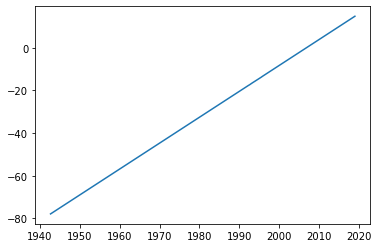

In [ ]:
ols_model = sm.ols(formula = 'ssha_tg ~ time', data=join_data_tg)
# Alternatively:
#ols_model = sm.ols(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))
y_joined =0.003325*join_data_tg['time'] - 2435.924051
plt.plot(join_data_tg.index,y_joined )

,time,ssha_tg
1942-08-31,709178.0,-2.466309
1942-09-30,709208.0,-34.466309
1942-10-31,709239.0,3.533691
1942-11-30,709269.0,-35.466309
1942-12-31,709300.0,-86.466309
...,...,...
2018-08-31,736922.0,57.404659
2018-09-30,736952.5,105.533691
2018-10-31,736983.0,79.404655
2018-11-30,737013.5,46.233692


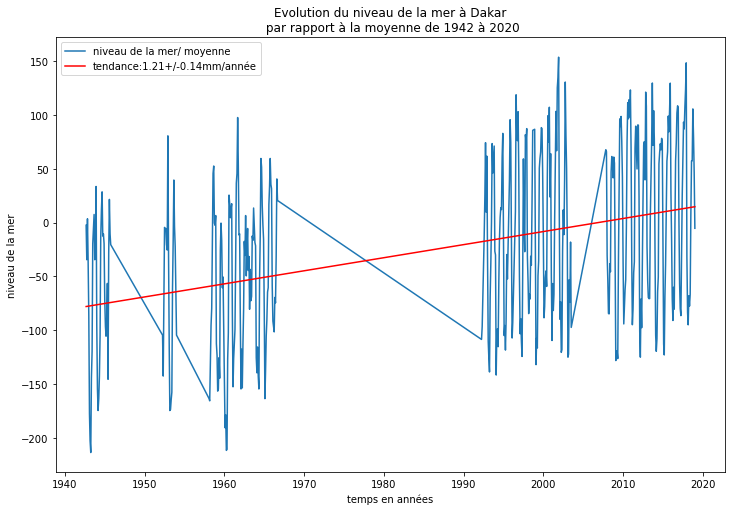

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(join_data_tg['ssha_tg'],label='niveau de la mer/ moyenne')
plt.plot(join_data_tg.index,y_joined,color='red',label=f'tendance:{round(0.003325494037424812*365.25,2)}+/-{round(0.00039105097194421526 *365.25,2)}mm/année')
plt.title('Evolution du niveau de la mer à Dakar\n par rapport à la moyenne de 1942 à 2020')
plt.savefig('données jointes de 1942 à 2020')
join_data_tg.dropna(inplace=True)
plt.xlabel('temps en années')
plt.ylabel('niveau de la mer')
plt.legend()
plt.savefig(r'C:\Users\Admin\Desktop\données mémoire\dakar data\join_data.jpg')
join_data_tg

In [ ]:
y_join=np.array(join_data_tg['ssha_tg'].values, dtype=float)
x_join=np.array(join_data_tg['time'].values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x_join,y_join)
xf = np.linspace(min(x_join),max(x_join),7731)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err,'\n',slope,'\n', intercept)
dictr={'index':[0],'p_value ': p_value, 'std ( $ \delta $ )': std_err,'tendance (mm/année)':slope*365.25}
dictr=pd.DataFrame(dictr)
dictr.to_csv(r'C:\Users\Admin\Desktop\données mémoire\dakar data\data_joined.csv')

r =  0.38133421401629025 
 p =  3.149985125541422e-16 
 s =  0.00039105097194421526 
 0.003325494037424812 
 -2435.9240511109865


In [ ]:
y=np.array( tg_dk['ssha_tg'].values, dtype=float)
x=np.array(tg_dk['time'].values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),7731)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err,'\n',slope,'\n', intercept)
x.shape

r =  0.1436757658211155 
 p =  6.165139459350784e-37 
 s =  0.00033450380459368046 
 0.004269486644242947 
 -3126.7414844287127


(7731,)

In [ ]:
print(0.004269486644242947*365.25)
print(0.00033450380459368046*365.25)
print(0.003325494037424812*365.25)

1.5594299968097363
0.1221775146278418
1.2146366971694125


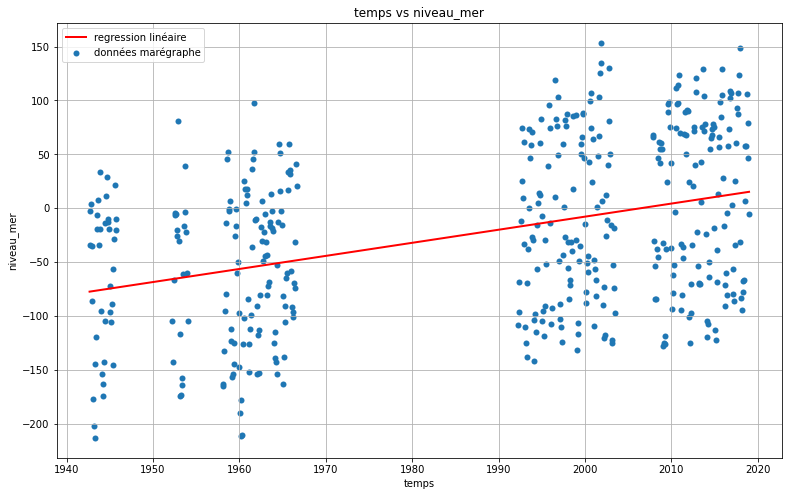

In [ ]:
satA_dk=join_data_tg #pd.DataFrame({'ssha_tg':join_data_tg['ssha_tg'],'time':join_data_tg['time'],
                     # 'tim':join_data_tg['time']})
#satA_dk.tim=tg_dk.tim.map(datetime.toordinal)
#satA_dk.dropna(inplace=True)
# First initialize the model.
model = LinearRegression()

# Fit the model to the data (If you get a runtime/computing warning, you most likely can just ignore and rerun)
x_input =satA_dk[['time']]
x_input_time=satA_dk.index


#x_input=np.arange(1,9788,1).reshape(n_points,1)
y_output =satA_dk[['ssha_tg']]
model.fit(x_input, y_output)

# Get predictions
y_pred = model.predict(x_input)

# Plot output
plt.figure(figsize=(13,8))
plt.scatter(x_input_time, y_output,label='données marégraphe', linewidth=0.01)
plt.plot(x_input_time, y_pred,label='regression linéaire' ,linewidth=2,color='r')
plt.grid(True)
plt.xlabel('temps')
plt.ylabel('niveau_mer')
plt.title('temps vs niveau_mer')
plt.legend()
plt.savefig('linear_regression')

In [ ]:
test_tg=df_tg_dk['1994':'2010'].isna().sum()
y_outputna =y_output.isna().sum()
test_tg

ssha_tg    0
dtype: int64

In [ ]:


ols_model = sm.ols(formula = 'ssha_tg ~ time', data=tg_dk)
# Alternatively:
#ols_model = sm.ols(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

Intercept, Slope : Intercept   -3126.741484
time            0.004269
dtype: float64


# PARTIAL AUTOCORRELATION

(427, 1)

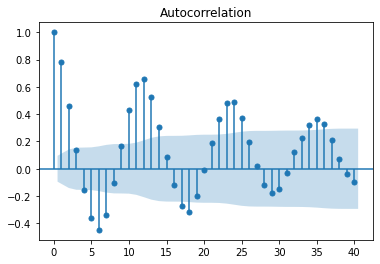

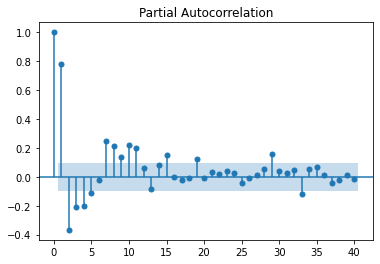

In [ ]:
splt.plot_acf(join_data_tg['ssha_tg'], lags = 40)
splt.plot_pacf(join_data_tg['ssha_tg'], lags = 40)


In [ ]:
import statsmodels.tsa.seasonal as sts

def decomp_ts(ts, model = 'additive'):
    res = sts.seasonal_decompose(ts,period='M' ,model = model) #, freq = freq)
    resplot = res.plot()
    
    return  res.plot()
'''(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                           index = ts.index) )'''

decomp = decomp_ts(join_data_tg['ssha_tg'])
print(decomp[:12])
decomp[-12:]

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
join_data_tg['ssha_tg']

1942-08-31     -2.466309
1942-09-30    -34.466309
1942-10-31      3.533691
1942-11-30    -35.466309
1942-12-31    -86.466309
                 ...    
2018-08-31     57.404659
2018-09-30    105.533691
2018-10-31     79.404655
2018-11-30     46.233692
2018-12-31     -5.305018
Name: ssha_tg, Length: 427, dtype: float64

In [ ]:
dsAVISO=xr.open_dataset(r"c:\Users\Admin\Desktop\zos_AVISO.nc")

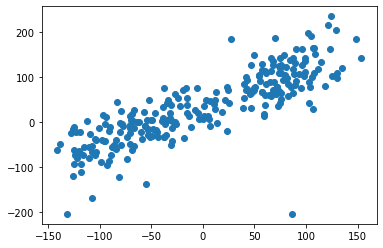

In [ ]:
plt.scatter(test_tg['1993':'2018']['ssha_tg'],test_B['1993':'2018']['ssha'])

#sp.pearsonr(test_tg['1993':'2018']['ssha_tg'],test_B['1993':'2018']['ssha'])

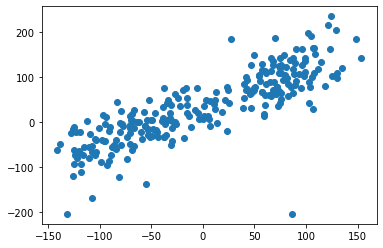

In [ ]:
plt.scatter(test_tg['1993':'2018']['ssha_tg'],test_B['1993':'2018']['ssha'])

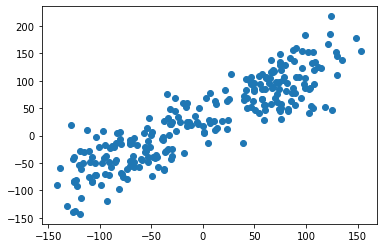

In [ ]:
plt.scatter(test_tg['1993':'2018']['ssha_tg'],test_A['1993':'2018']['ssha'])
#test_tg['1996':'2019'][['ssha_tg']]

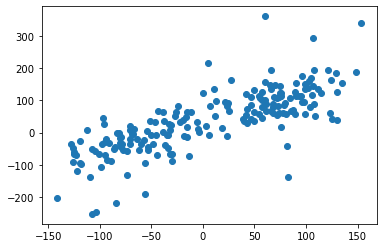

In [ ]:
plt.scatter(test_tg['1993':'2018']['ssha_tg'],test_C['1993':'2018']['ssha'])

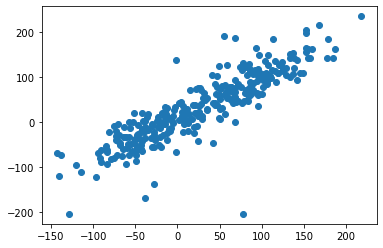

In [ ]:
plt.scatter(test_A['1993':'2018'][['ssha']],test_B['1993':'2018'][['ssha']])


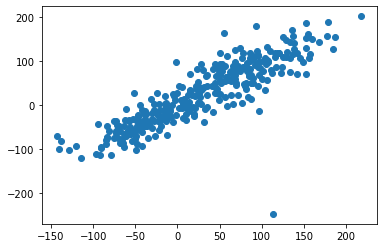

In [ ]:
plt.scatter(test_A['1992':'2019'][['ssha']],test_D['1992':'2019'][['ssha']])

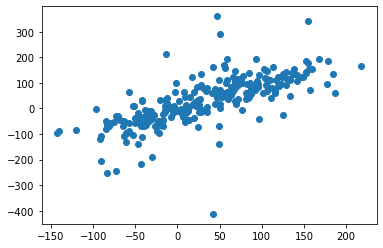

In [ ]:
plt.scatter(test_A['1993':'2019'][['ssha']],test_C['1993':'2019'][['ssha']])

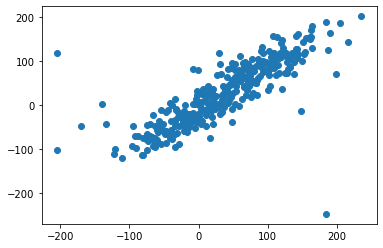

In [ ]:
plt.scatter(test_B['1992':'2019']['ssha'],test_D['1992':'2019']['ssha'])

In [ ]:
# create a linear regression model
model = LinearRegression()
model.fit(x_, y_)

In [ ]:
x_new.reshape((8766,))
x_new.shape

# sea level variation

In [ ]:
data_ers2 =xr.open_dataset(r"c:\Users\Admin\Desktop\global-reanalysis-phy-001-030-monthly_1635351360300.nc")

longitudes = data_ers2['zos']['longitude'][:]
latitudes = data_ers2['zos']['latitude'][:]
temps = data_ers2['zos']['time'][:]
lon_indx=np.arange(133)
lat_indx=np.arange(61)
mesh=np.array(np.meshgrid(lon_indx,lat_indx)).T.reshape(-1,2)
mesh


array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [132,  58],
       [132,  59],
       [132,  60]])

In [ ]:
data_ers2

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 61, longitude: 133, time: 324)
Coordinates:
  * depth      (depth) float32 0.494
  * latitude   (latitude) float32 13.0 13.08 13.17 13.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12:00:00
  * longitude  (longitude) float32 -26.0 -25.92 -25.83 ... -15.17 -15.08 -15.0
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [ ]:
 data_ers2['zos']

<xarray.DataArray 'zos' (time: 324, latitude: 61, longitude: 133)>
[2628612 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 13.0 13.08 13.17 13.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2019-12-16T12:00:00
  * longitude  (longitude) float32 -26.0 -25.92 -25.83 ... -15.17 -15.08 -15.0
Attributes:
    long_name:      Sea surface height
    standard_name:  sea_surface_height_above_geoid
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]

In [ ]:
arrayseries= [data_ers2['zos'][:,mesh[i][1],mesh[i][0]] for i in range(mesh.shape[0])]


In [ ]:
taille=len(arrayseries)

In [ ]:
def iterater(tseries):
    time_df =pd.DataFrame({'date':tseries['time']})
    df=pd.DataFrame({'time':tseries['time'],
                    'numtime':time_df['date'].map(datetime.toordinal),
                    'ssh': np.array(tseries)})
    df.set_index('time',inplace=True)
    df.dropna()
    y=np.array( df['ssh'].values, dtype=float)
    x=np.array(df['numtime'].values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    return slope*365.25,std_err*365.25

arrayslopes = [iterater(arrayseries[i])[0] for i in range(taille)]
arraystd = [iterater(arrayseries[i])[1] for i in range(taille)]

In [ ]:
arrayslopes_mm = [arrayslopes[i]*1000 for i in range(taille)]
arraystd_mm = [arraystd[i]*1000 for i in range(taille)]

mesh_coor =np.array(np.meshgrid(longitudes,latitudes)).T.reshape(-1,2)
alldata = pd.DataFrame({
    'longitude':np.array([mesh_coor[i][0] for i in range(taille)]),
    'latitude':np.array([mesh_coor[i][1] for i in range(taille)]),
    'tendance':np.array([arrayslopes_mm[i] for i in range(taille)]),
    'erreur':np.array([arraystd_mm[i] for i in range(taille)])})


In [ ]:
alldata.to_excel(r"c:\Users\Admin\Desktop\tendanceNEW.xlsx", index = False,
                 header = True)
alldata.loc[(alldata['latitude']<14.6)&(alldata['tendance']>2.2)]

,longitude,latitude,tendance,erreur
0,-26.000000,13.000000,2.570761,0.222594
1,-26.000000,13.083333,2.592991,0.221936
2,-26.000000,13.166667,2.612798,0.221311
3,-26.000000,13.250000,2.633596,0.220870
4,-26.000000,13.333333,2.647581,0.220897
...,...,...,...,...
6840,-16.666666,13.666667,3.050572,0.550268
6841,-16.666666,13.750000,3.056945,0.559341
6899,-16.583334,13.500000,3.045254,0.547611
6900,-16.583334,13.583333,3.051549,0.555282


In [ ]:
alldata['erreur'].max()

0.5625025823535091

In [ ]:
alldata.to_csv(r"c:\Users\Admin\Desktop\tendance0120.csv",
               index = False, header = False)

In [ ]:
alldata['tseries'] = arrayseries
aldat_=alldata[['longitude','latitude','tendance']]
aldat_.to_csv(r"c:\Users\Admin\Desktop\tendance0144545.csv", 
              index = False, header = False)

In [ ]:
x_lon = np.array(alldata['longitude'])
x_lat = np.array(alldata['latitude'])
z_val= np.array(alldata['tendance'])
x_loni,x_lati = np.meshgrid(x_lon,x_lat)
zi = griddata((x_lon,x_lat),z_val,(x_loni,x_lati),method='linear')

In [ ]:
aldat_['tendance'].mean()                                                         

#aldat_


2.3309283237867744

In [ ]:
# plot
fig = plt.figure()
#ax = fig.add_subplot(111)
plt.contourf(x_loni,x_lati,zi)
#plt.plot(x,y,'k.')
plt.xlabel('longitudes',fontsize=16)
plt.ylabel('latitudes',fontsize=16)
plt.savefig('tendance2.png',dpi=100)
plt.close(fig)

In [ ]:
val=aldat_.groupby(['latitude'])['tendance'].mean()

<AxesSubplot:xlabel='latitude'>

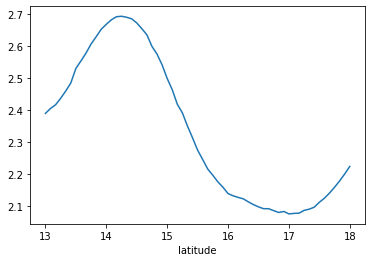

In [ ]:
val.plot()

<AxesSubplot:xlabel='longitude'>

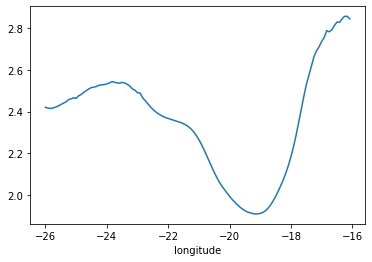

In [ ]:
val_lon=aldat_.groupby(['longitude'])['tendance'].mean()
val_lon.plot()

# MODEL peltier

In [ ]:
data_gia=xr.open_dataset(r"c:\Users\Admin\Desktop\dsea250.1grid.ICE5Gv1.3_VM2_L90_2012.nc")

In [ ]:
data_gia

<xarray.Dataset>
Dimensions:   (Lat: 180, Lon: 360)
Coordinates:
  * Lon       (Lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Lat       (Lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
Data variables:
    Dsea_250  (Lat, Lon) float32 ...
Attributes:
    title:    ICE-5G v1.3, VM2_L90, Corrected March 2012
    history:  created: 2012, 3/29 14:36  by program create_netcdf

In [ ]:
#data_gia['Drad']
long_gia = data_gia['Dsea_250']['Lon'][:]
lat_gia = data_gia['Dsea_250']['Lat'][:]
#lon_dx=np.arange(360)
#lat_dx=np.arange(180)
mesh_1 = np.meshgrid(long_gia,lat_gia)
mesh1 = np.array(mesh_1).T.reshape(-1,2)
mesh_gia=np.array(mesh_1).T.reshape(-1,2)
#mesh_gia


In [ ]:
mesh1

array([[  0. ,  89.5],
       [  0. ,  88.5],
       [  0. ,  87.5],
       ...,
       [359. , -87.5],
       [359. , -88.5],
       [359. , -89.5]], dtype=float32)

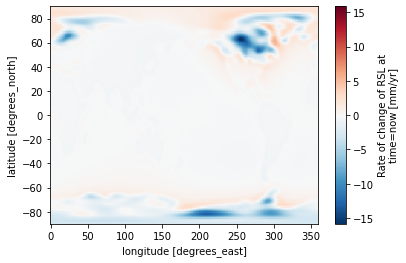

In [ ]:
data_gia['Dsea_250'].plot()

In [ ]:
data_gia

<xarray.Dataset>
Dimensions:   (Lat: 180, Lon: 360)
Coordinates:
  * Lon       (Lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * Lat       (Lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
Data variables:
    Dsea_250  (Lat, Lon) float32 1.489 1.486 1.484 1.481 ... -2.705 -2.71 -2.714
Attributes:
    title:    ICE-5G v1.3, VM2_L90, Corrected March 2012
    history:  created: 2012, 3/29 14:36  by program create_netcdf

In [ ]:
mesh_gia

array([[  0. ,  89.5],
       [  0. ,  88.5],
       [  0. ,  87.5],
       ...,
       [359. , -87.5],
       [359. , -88.5],
       [359. , -89.5]], dtype=float32)

In [ ]:
array_gia= [data_gia['Dsea_250'][int(mesh1[i][1]),int(mesh1[i][0])] for i in range(mesh_gia.shape[0])]

In [ ]:
len(array_gia)

64800

In [ ]:
all_pltier = pd.DataFrame({
    'longitude':np.array([mesh_gia[i][0] -360 for i in range(mesh_gia.shape[0])]),
    'latitude':np.array([mesh_gia[i][1] for i in range(mesh_gia.shape[0])]),
    'tendance_peltier':np.array(array_gia)
})


In [ ]:
all_pltier_zon=all_pltier.loc[(all_pltier['longitude']<-15)&(all_pltier['longitude']>-26)&(all_pltier['latitude']<17.5)&(all_pltier['latitude']>14)]

In [ ]:
all_pltier_zon.to_csv(r"c:\Users\Admin\Desktop\tendance_niv_mer.csv", 
              index = False, header = True) #= all_pltier_zon.loc[(all_pltier['latitude']<17)&(all_pltier['latitude']>14)]

In [ ]:
all_pltier_zon

,longitude,latitude,tendance_peltier
60373,-25.0,16.5,-0.506943
60374,-25.0,15.5,0.020789
60375,-25.0,14.5,-0.743218
60553,-24.0,16.5,-0.696745
60554,-24.0,15.5,-0.198251
60555,-24.0,14.5,-0.942457
60733,-23.0,16.5,-0.807827
60734,-23.0,15.5,-0.375881
60735,-23.0,14.5,-1.095730
60913,-22.0,16.5,-0.828326


<AxesSubplot:xlabel='latitude'>

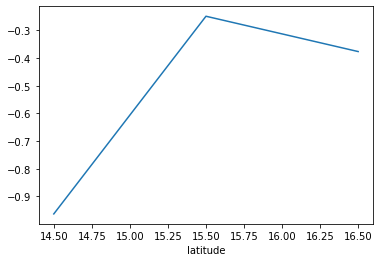

In [ ]:
all_pltier_zon.groupby(['latitude'])['tendance_peltier'].mean().plot()

# PALMERIA

In [ ]:
ds_PAL= xr.open_dataset(r'c:\Users\Admin\Desktop\d235a.nc')

In [ ]:
ds_PAL

<xarray.Dataset>
Dimensions:               (record_id: 1, time: 6868)
Coordinates:
  * time                  (time) datetime64[ns] 2000-03-13T12:00:00 ... 2018-...
  * record_id             (record_id) int16 2351
Data variables: (12/13)
    sea_level             (record_id, time) float32 ...
    lat                   (record_id) float32 ...
    lon                   (record_id) float32 ...
    station_name          (record_id) |S8 ...
    station_country       (record_id) |S10 ...
    station_country_code  (record_id) float32 ...
    ...                    ...
    version               (record_id) |S1 ...
    gloss_id              (record_id) float32 ...
    ssc_id                (record_id) |S4 ...
    decimation_method     (record_id) int16 ...
    reference_code        (record_id) |S1 ...
    reference_offset      (record_id) int16 ...
Attributes:
    title:                  JASL/UHSLC Research Quality Tide Gauge Data (daily)
    ncei_template_version:  NCEI_NetCDF_TimeSeries_Orthogonal_Template_v2.0
    featureType:            timeSeries
    Conventions:            CF-1.6, ACDD-1.3
    date_created:           2020-10-27T23:29:21Z
    publisher_name:         University of Hawaii Sea Level Center (UHSLC)
    publisher_email:        philiprt@hawaii.edu, markm@soest.hawaii.edu
    publisher_url:          http://uhslc.soest.hawaii.edu
    summary:                The Joint Archive for Sea Level (JASL) Research Q...
    processing_level:       The JASL receives hourly data from regional and n...
    acknowledgment:         The JASL/UHSLC Research Quality Data Set is suppo...

In [ ]:
df_tg_PL=pd.DataFrame()
df_tg_PL['ssha_tg']=pd.Series(ds_PAL['sea_level'][0,:]-ds_PAL['sea_level'][0,:].mean(skipna=True))
df_tg_PL['time']=pd.Series(ds_PAL['time'])
df_tg_PL.set_index('time',inplace=True)
test_tg_PL=df_tg_PL.resample(rule='M').mean()

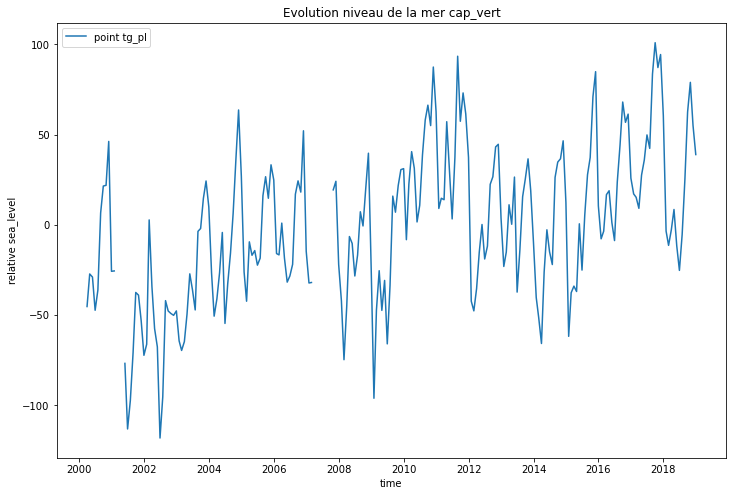

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(test_tg_PL,label='point tg_pl')
plt.xlabel('time')
plt.ylabel('relative sea_level')
plt.title('Evolution niveau de la mer cap_vert')
plt.legend()

### Points dsat

In [ ]:
iy__2=get_index(latvalus,lonvalus, 14.615259,-23.094218+360)
indx__A=iy__2[0]
orbt__A=iy__2[1]
n_record__A=n_records(indx__A,orbt__A)

In [ ]:
iy__1=get_index(latvalus,lonvalus, 15.866774,-23.571523+360)
indx__B=iy__1[0]
orbt__B=iy__1[1]
n_record__B=n_records(indx__B,orbt__B)

In [ ]:
iy__3=get_index(latvalus,lonvalus, 15.513477,-24.744908+360)
indx__C = iy__3[0]
orbt__C = iy__3[1]
n_record__C = n_records(indx__C,orbt__C)

In [ ]:
x__A=np.array(ds['ssha'][:,n_record__A])
y__A=np.array(ds['time'][:,n_record__A])

In [ ]:
x__B=np.array(ds['ssha'][:,n_record__B])
y__B=np.array(ds['time'][:,n_record__B])

In [ ]:
x__C=np.array(ds['ssha'][:,n_record__C])
y__C=np.array(ds['time'][:,n_record__C])

<AxesSubplot:xlabel='time'>

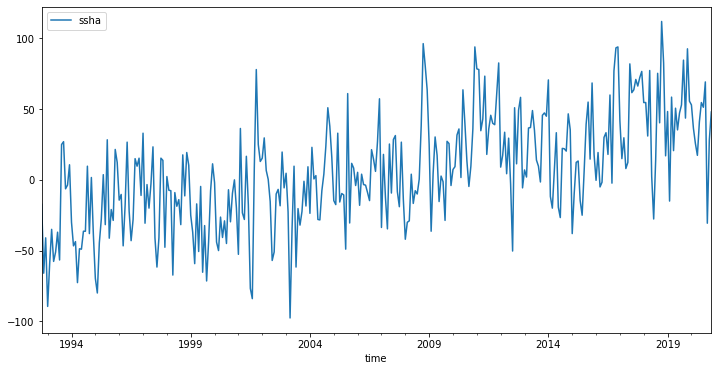

In [ ]:
dfsat__A=pd.DataFrame()
dfsat__A['ssha']=pd.Series(x__A[:,0])
dfsat__A['time']=pd.Series(y__A[:,0])
dfsat__A.set_index('time',inplace=True)
test__A=dfsat__A.resample(rule='M').mean()

test__A.plot(figsize=(12,6))

<AxesSubplot:xlabel='time'>

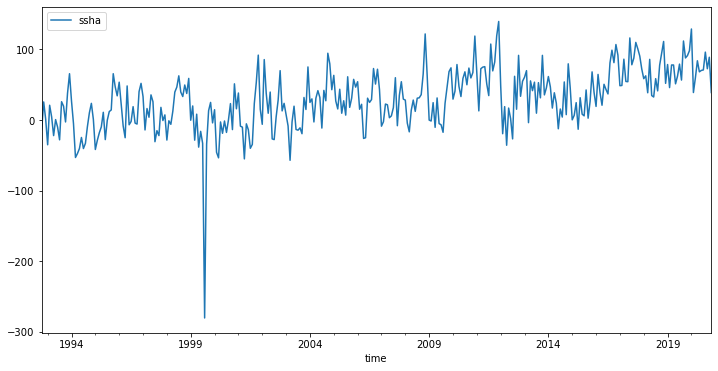

In [ ]:
dfsat__B=pd.DataFrame()
dfsat__B['ssha']=pd.Series(x__B[:,0])
dfsat__B['time']=pd.Series(y__B[:,0])
dfsat__B.set_index('time',inplace=True)
test__B=dfsat__B.resample(rule='M').mean()

test__B.plot(figsize=(12,6))

<AxesSubplot:xlabel='time'>

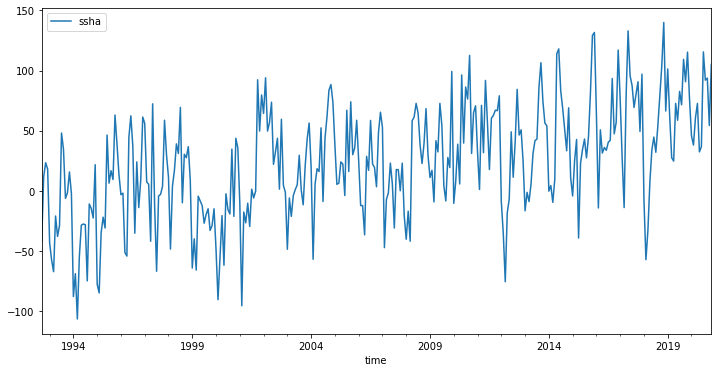

In [ ]:
dfsat__C=pd.DataFrame()
dfsat__C['ssha']=pd.Series(x__C[:,0])
dfsat__C['time']=pd.Series(y__C[:,0])
dfsat__C.set_index('time',inplace=True)
test__C=dfsat__C.resample(rule='M').mean()

test__C.plot(figsize=(12,6))

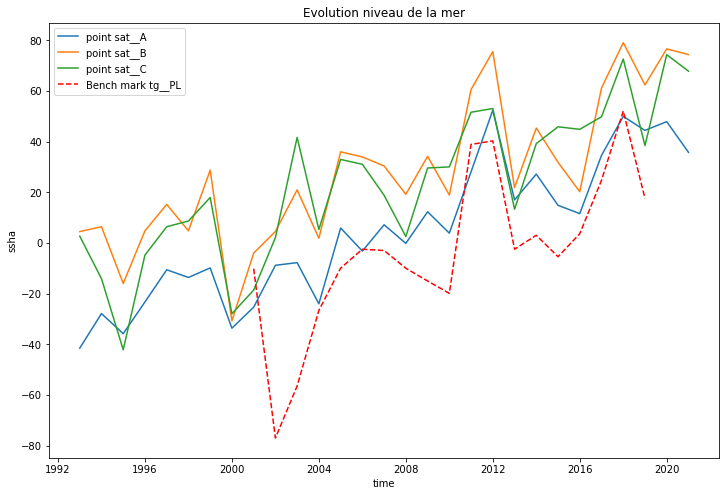

In [ ]:
test_tg__PL=df_tg_PL.resample(rule='A').mean()
test__A_=test__A.resample(rule='A').mean()
test__B_=test__B.resample(rule='A').mean()
test__C_=test__C.resample(rule='A').mean()

plt.figure(figsize=(12,8))
plt.plot(test__A_,label='point sat__A')
plt.plot(test__B_,label='point sat__B')
plt.plot(test__C_,label='point sat__C')
#plt.plot(test_D_,label='point sat_D')
#plt.plot(test_C_,label='point sat_C')
plt.plot(test_tg__PL,label='Bench mark tg__PL',ls='--',c='r')
plt.xlabel('time')
plt.ylabel('ssha')
plt.title('Evolution niveau de la mer')
plt.legend()
plt.savefig('PALMERIA')

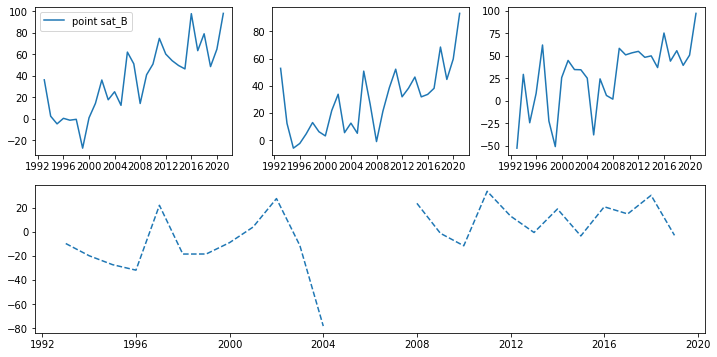

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]
ax1.plot(test_B_['ssha'],label='point sat_B')
ax1.legend()
ax2.plot(test_D_['ssha'],label='point sat_D')
ax3.plot(test_C_['ssha'],label='point sat_C')
ax4.plot(test_tg_,label='Bench mark',ls='--')